In [3]:
import os
import pandas as pd

def ApneaIndex(data):
    apnea_count = data[data['description'].str.contains('apnea', case=False, na=False)].shape[0]
    hypopnea_count = data[data['description'].str.contains('hypopnea', case=False, na=False)].shape[0]
    count_sleep = data[data['description'].str.contains('sleep stage', case=False, na=False)].shape[0]
    count_sleep_del = data[data['description'] == 'Sleep stage ?'].shape[0]
    time = (count_sleep - count_sleep_del) * 30 / 3600  # Assuming each sleep stage represents 30 seconds
    if time == 0:  # Prevent division by zero
        return None
    AHI = (apnea_count + hypopnea_count) / time
    return AHI

# Path to the directory containing the .tsv files
directory_path = '/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/sleep data/tsv'

# List or dictionary to store the AHI values with identifiers
AHI_data = {}

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a .tsv file
    if filename.endswith('.tsv'):
        SLEEP_STUDY_ID = filename.split('_')[-1].split('.')[0]  # Extract the identifier after the underscore
        file_path = os.path.join(directory_path, filename)
        try:
            # Read the .tsv file
            data = pd.read_csv(file_path, delimiter='\t')
            # Calculate AHI and add to the dictionary with the identifier as key
            AHI_data[int(SLEEP_STUDY_ID)] = ApneaIndex(data)
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Create a DataFrame from the AHI data
AHI_df = pd.DataFrame(list(AHI_data.items()), columns=['SLEEP_STUDY_ID', 'AHI'])

# Set the 'Identifier' as the index of the DataFrame
AHI_df.set_index('SLEEP_STUDY_ID', inplace=True)

# Now AHI_df is the desired DataFrame
print(AHI_df)

                     AHI
SLEEP_STUDY_ID          
25000           0.351562
3868            0.000000
3241            0.382572
12052           0.268757
10429           2.649842
...                  ...
16237           0.000000
17761           0.000000
3415            3.294951
10120           6.250000
5329            0.255864

[3984 rows x 1 columns]


In [31]:
import numpy as np
np.mean(AHI_df['AHI'])

2.773810083143027

In [32]:
np.std(AHI_df['AHI'])

7.123602108440383

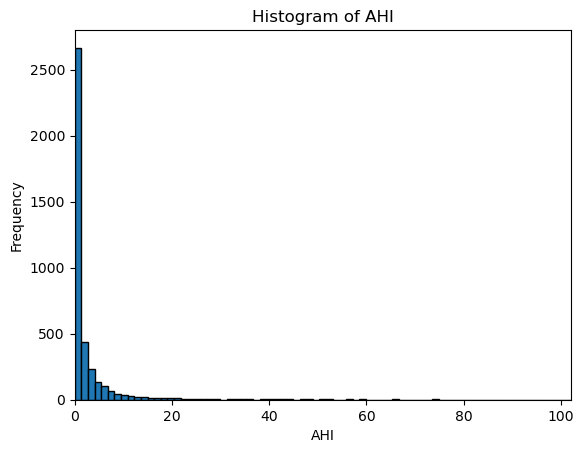

In [11]:
import matplotlib.pyplot as plt
plt.hist(AHI_df['AHI'], bins=75, edgecolor='black')
plt.title('Histogram of AHI')
plt.xlabel('AHI')
plt.ylabel('Frequency')
plt.show()

In [33]:
merged = pd.read_csv('/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/merged.csv')

In [34]:
joined_df = pd.merge(merged, AHI_df, on='SLEEP_STUDY_ID', how='inner')

In [35]:
joined_df.head()

,STUDY_PAT_ID,SLEEP_STUDY_ID,AGE,SLEEP_DURATION,HIGH BP,LOW BP,BMI,GENDER,RACE,AHI
0,1,4789,9.145205,9:35:32,105.0,65.0,17.37,M,White,0.000000
1,7,12595,2.123288,11:22:32,120.0,54.0,15.63,F,White,0.538117
2,10,22339,13.101370,11:14:13,127.0,70.0,31.75,F,Black or African American,3.472669
3,16,24241,12.076712,10:03:36,102.0,65.0,16.17,M,White,0.000000
4,22,23233,4.739726,11:15:36,86.0,52.0,18.04,M,Black or African American,0.276180


In [36]:
joined_df.to_csv("merged.csv", index=False)

In [38]:
df = pd.read_csv('/Users/lisonghe/Library/CloudStorage/OneDrive-JohnsHopkins/Semester 2/602 Research and Design in Data Mining/merged.csv')

# Round the column 'your_column_name' to 2 decimal places
df['AHI'] = df['AHI'].round(2)

# Save the modified DataFrame back to a new CSV file
df.to_csv('merged.csv', index=False)